# Regression

<a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/dc_supervised_student/02_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this chapter, you will be introduced to regression, and build models to predict sales values using a dataset on advertising expenditure. You will learn about the mechanics of linear regression and common performance metrics such as R-squared and root mean squared error. You will perform k-fold cross-validation, and apply regularization to regression models to reduce the risk of overfitting.

## Creating features

In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

|   | tv      | radio    | social_media | sales     |
|---|---------|----------|--------------|-----------|
| 1 | 13000.0 | 9237.76  | 2409.57      | 46677.90  |
| 2 | 41000.0 | 15886.45 | 2913.41      | 150177.83 |

You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

### Instructions
 - Create X, an array of the values from the sales_df DataFrame's "radio" column.
 - Create y, an array of the values from the sales_df DataFrame's "sales" column.
 - Reshape X into a two-dimensional NumPy array.
 - Print the shape of X and y.

In [2]:
import pandas as pd

sales_df = pd.read_csv("https://raw.githubusercontent.com/marcinsawinski/UEP_KIE_ML_CLASS/refs/heads/main/dc_supervised_student/datasets/advertising_and_sales_clean.csv").drop(columns=["influencer"])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   sales         4546 non-null   float64
dtypes: float64(4)
memory usage: 142.2 KB


In [3]:
import numpy as np

# Create X from the radio column's values
X = ____

# Create y from the sales column's values
y = ____

# Reshape X
X = ____

# Check the shape of the features and targets
print(____)

(4546, 1) (4546,)


## Building a linear regression model
Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

X and y have been preloaded for you as follows:
```
y = sales_df["sales"].values
X = sales_df["radio"].values.reshape(-1, 1)
```

### Instructions
 - Import LinearRegression.
 - Instantiate a linear regression model.
 - Predict sales values using X, storing as predictions.

In [4]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = ____()

# Fit the model to the data
____

# Make predictions
predictions = ____

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


## Visualizing a linear regression model
Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.

# Instructions
 - Import matplotlib.pyplot as plt.
 - Create a scatter plot visualizing y against X, with  - observations in blue.
 - Draw a red line plot displaying the predictions against X.
 - Display the plot.

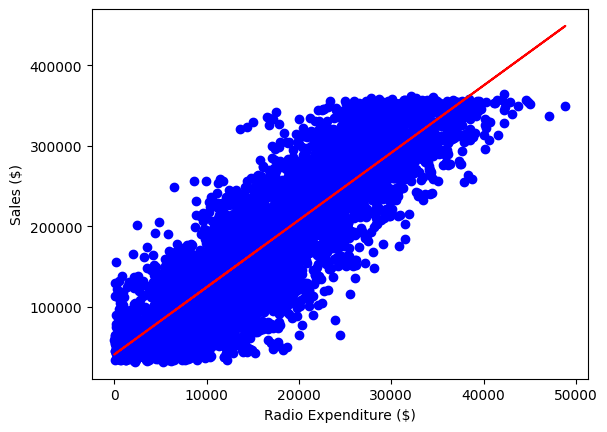

In [5]:
# Import matplotlib.pyplot
import ____.____ as ____

# Create scatter plot
plt.scatter(____, ____, color="____")

# Create line plot
plt.plot(____, ____, color="____")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.____()

## Fit and predict for regression

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. As a reminder, here are the first two rows:

|   | tv      | radio    | social_media | sales     |
|---|---------|----------|--------------|-----------|
| 1 | 13000.0 | 9237.76  | 2409.57      | 46677.90  |
| 2 | 41000.0 | 15886.45 | 2913.41      | 150177.83 |

You will then use this model to predict sales based on the values of the test features.

LinearRegression and train_test_split have been preloaded for you from their respective modules.

### Instructions
 - Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
 - Instantiate a linear regression model.
 - Fit the model to the training data.
 - Create y_pred, making predictions for sales using the test features.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Create X and y arrays
X = sales_df.____("____", axis=____).____
y = sales_df["____"].____

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = ____

# Fit the model to the data
____

# Make predictions
y_pred = reg.____(____)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


## Regression performance
Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.


### Instructions
 - Import root_mean_squared_error.
 - Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
 - Calculate the model's root mean squared error using y_test and y_pred.
 - Print r_squared and rmse.

In [8]:
# Import root_mean_squared_error
from ____.____ import root_mean_squared_error

# Compute R-squared
r_squared = reg.____(____, ____)

# Compute RMSE
rmse = ____(____, ____)

# Print the metrics
print("R^2: {}".format(____))
print("RMSE: {}".format(____))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


## Cross-validation for R-squared

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The sales_df dataset has been split into y for the target variable, and X for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model.

### Instructions
 - Import KFold and cross_val_score.
 - Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
 - Perform cross-validation using reg on X and y, passing kf to cv.
 - Print the cv_scores.

In [9]:
# Import the necessary modules
from ____.____ import ____, ____

# Create a KFold object
kf = ____(n_splits=____, shuffle=____, random_state=____)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = ____(____, ____, ____, cv=____)

# Print scores
print(____)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


## Analyzing cross-validation metrics
Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_scores, which has been preloaded for you from the previous exercise.

numpy has been imported for you as np.

### Instructions
 - Calculate and print the mean of the results.
 - Calculate and print the standard deviation of cv_scores.
 - Display the 95% confidence interval for your results using np.quantile().

In [10]:
# Print the mean
print(mean(____))

# Print the standard deviation
print(____(____))

# Print the 95% confidence interval
print(____(____, [____, ____]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


## Regularized regression: Ridge
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their  scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X_train, X_test, y_train, y_test for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.

### Instructions
 - Import Ridge.
 - Instantiate Ridge, setting alpha equal to alpha.
 - Fit the model to the training data.
 - Calculate the  score for each iteration of ridge.


In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:

  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)

  # Fit the data
  ridge.fit(X_train, y_train)

  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

## Lasso regression for feature importance
In the video, you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as X and y, along with sales_columns, which contains the dataset's feature names.

### Instructions
 - Import Lasso from sklearn.linear_model.
 - Instantiate a Lasso regressor with an alpha of 0.3.
 - Fit the model to the data.
 - Compute the model's coefficients, storing as lasso_coef.

In [ ]:
sales_columns = list(sales_df.drop(columns='sales').columns)

In [ ]:
# Import Lasso
from ____.____ import ____

# Instantiate a lasso regression model
lasso = ____

# Fit the model to the data
____

# Compute and print the coefficients
lasso_coef = ____
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()